In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
# load Boston.csv into DataFrame
df=pd.read_csv('Boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [4]:
# See rows with missing values
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


In [5]:
# Viewing the data statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Observations:

There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.
There are 13 columns in the dataset and every column is of numeric data type.

In [6]:
# Spliting target variable and independent variables
X=df.drop(['MEDV'],axis = 1)
Y=df['MEDV']

In [7]:
# Splitting to training and testing data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [8]:
# Standardizing features
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [18]:
# Define models DecisionTree,RandomForest and SVC
models={
    "Linear Regression":LinearRegression(),
    "KNN":KNeighborsRegressor(n_neighbors=5), 
    "Support Vector":SVR(kernel='rbf',C=100),
    "Decision Tree":DecisionTreeRegressor(criterion='squared_error'),
    "Random Forest":RandomForestRegressor(n_estimators=100,criterion='squared_error')
}

# Model Evaluation using accuracy_score()
model_eval={}
for model,regressor in models.items(): 
    regressor.fit(x_train,y_train)
    y_pred=regressor.predict(x_test)
    r2=r2_score(y_test,y_pred)
    model_eval[model]=r2,mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)
    
data=pd.DataFrame.from_dict(model_eval,orient='index',columns=['R2_Score','MAE','MSE'])
print(data.sort_values(by=['R2_Score'],ascending=False,))

                   R2_Score       MAE        MSE
Random Forest      0.900492  2.258382   9.986930
Support Vector     0.852244  2.541796  14.829185
Decision Tree      0.772149  3.450000  22.867745
Linear Regression  0.743392  3.681057  25.753966
KNN                0.649882  3.684902  35.138851


Performance Comparison 

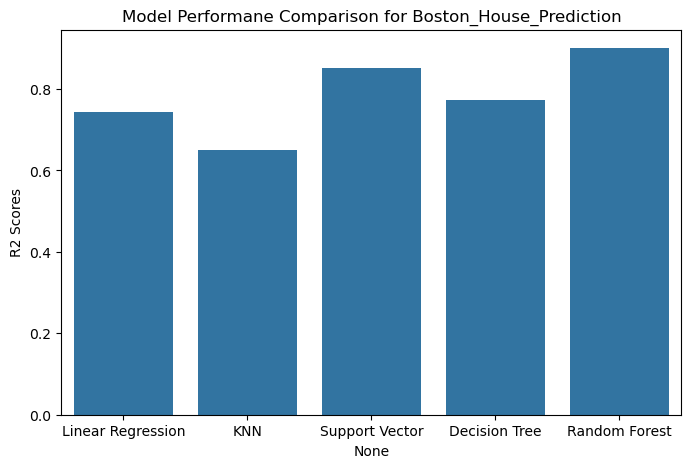

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x=data.index,y=data.R2_Score)
plt.ylabel("R2 Scores")
plt.title("Model Performane Comparison for Boston_House_Prediction")
plt.show()

Observation

Based on the above comparison, SVR and RandomForestRegressor are the best models whose r2_scores almost same level. So we can choose either SVR model or RandomForest. Since Random Forest shows highest r2_score, we choose RandomForest model for boston house.

In [20]:
# create RandomForest model()
random_model=RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth=3)

# # Train the model
random_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=3)

In [21]:
# Model prediction on train data
y_pred=random_model.predict(x_test)
df=pd.DataFrame(data={'Actual Value':y_test,'Predicted Value':y_pred})
df.head()

,Actual Value,Predicted Value
115,18.3,18.996228
410,15.0,27.799463
349,26.6,29.440969
154,17.0,16.576400
186,50.0,41.101525


In [22]:
# Model Evaluation
print("R2 Score for RandomForest is:",r2_score(y_test,y_pred))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))

R2 Score for RandomForest is: 0.869488167857515
Mean Absolute Error : 2.558903764967448
Mean Squared Error : 13.098545938061978


Visualizing the differences between actual prices and predicted values

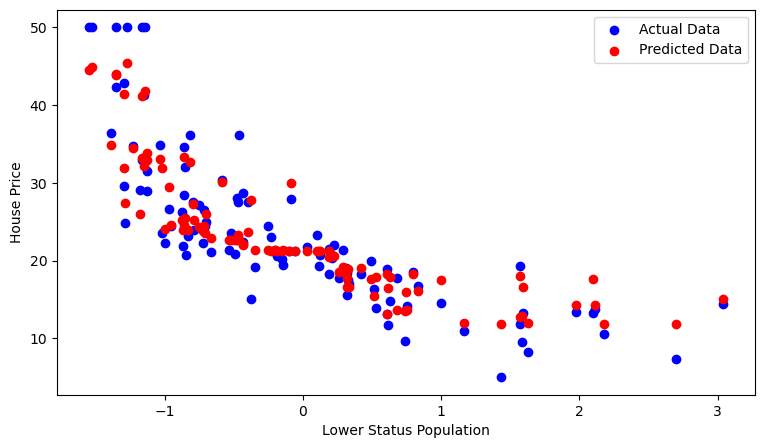

In [23]:
plt.figure(figsize=(9,5))
plt.scatter(x_test[:,11],y_test,color='b',label='Actual Data')
plt.scatter(x_test[:,11],y_pred,color='r',label='Predicted Data')
plt.xlabel('Lower Status Population')
plt.ylabel('House Price')
plt.legend()
plt.show()